[Reference](https://medium.com/swlh/create-your-own-active-matter-simulation-with-python-76fce4a53b6f)

In [2]:
import numpy as np

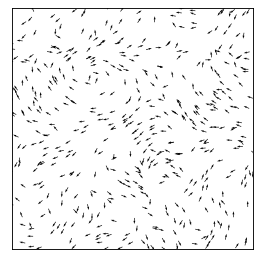

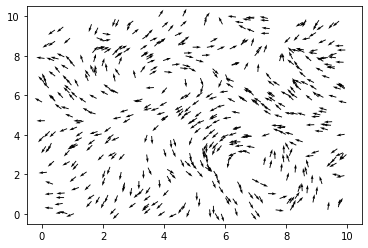

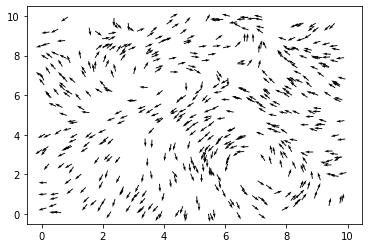

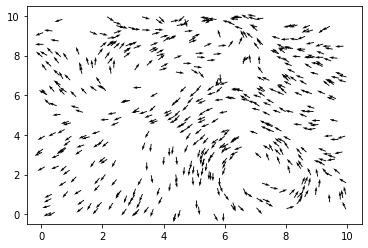

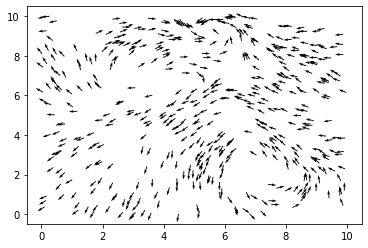

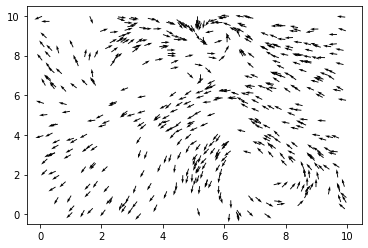

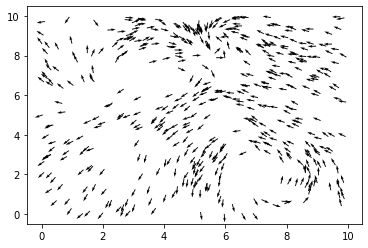

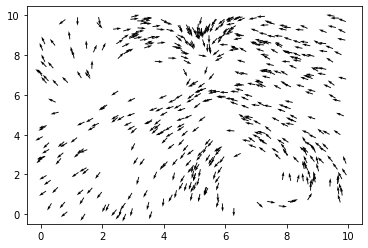

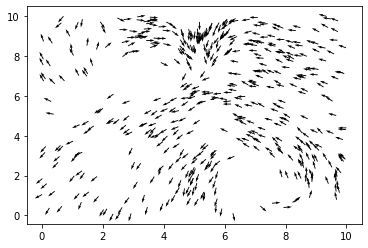

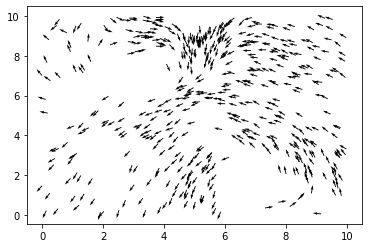

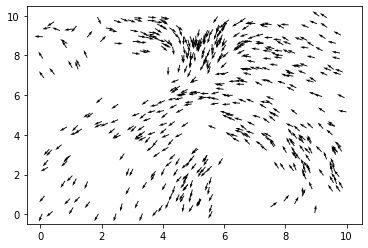

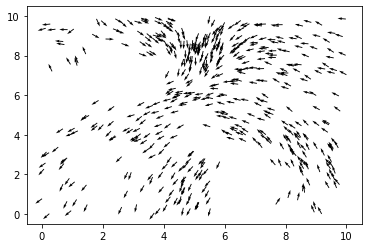

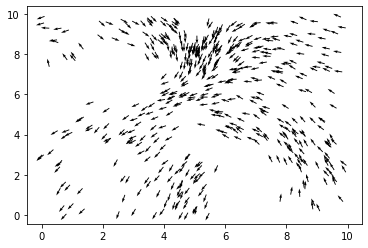

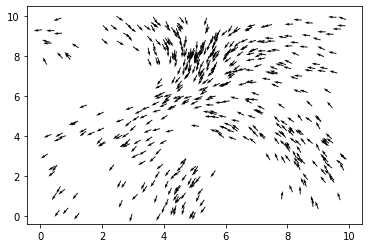

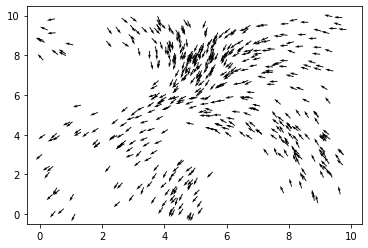

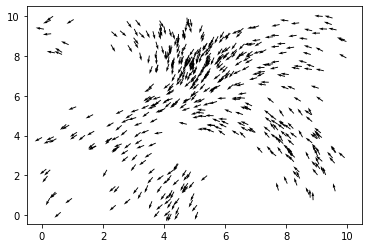

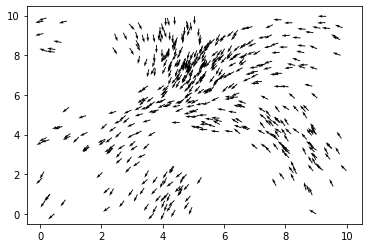

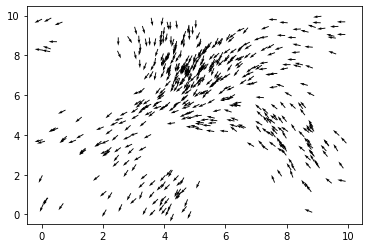

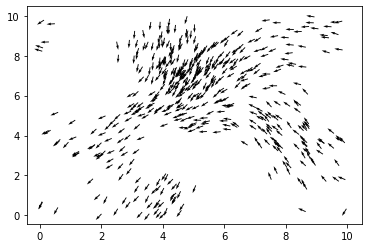

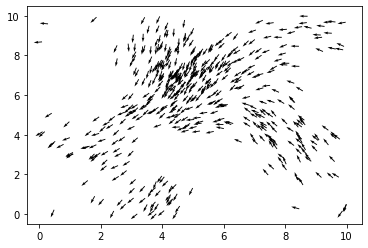

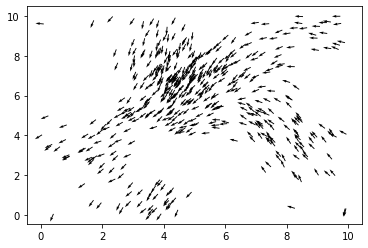

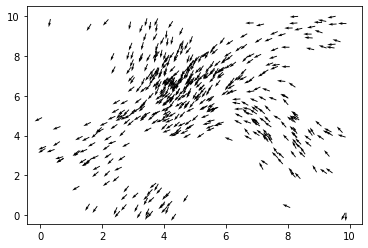

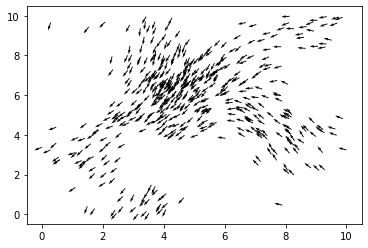

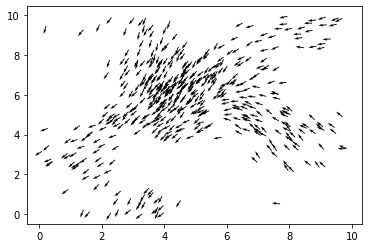

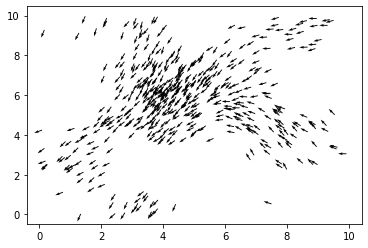

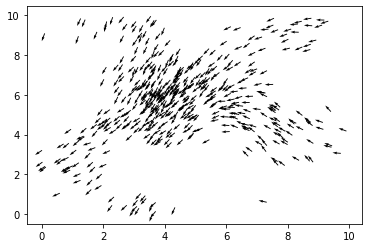

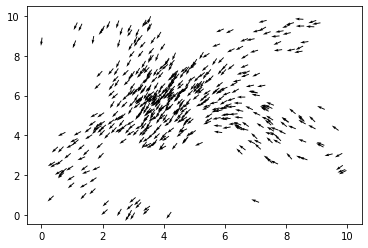

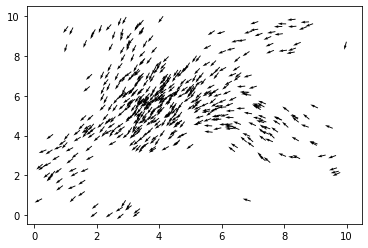

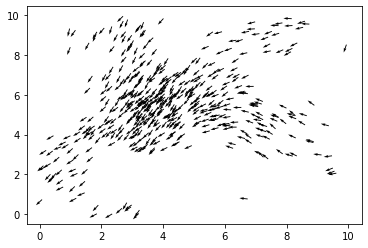

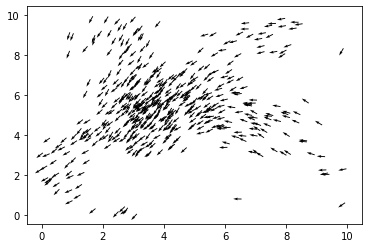

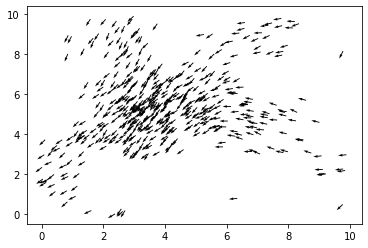

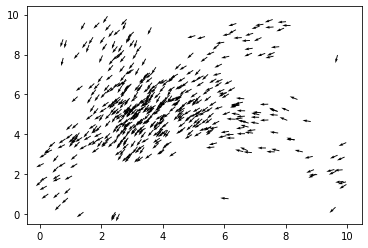

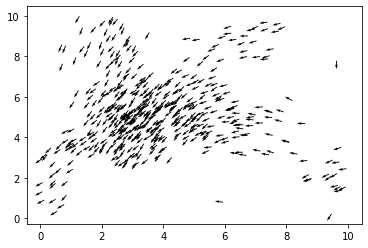

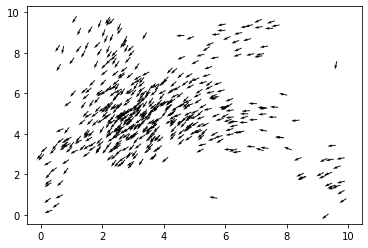

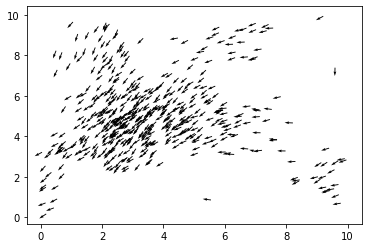

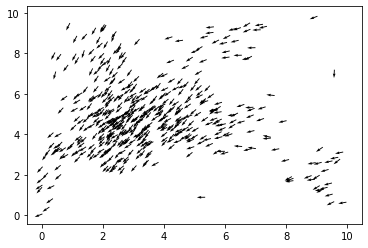

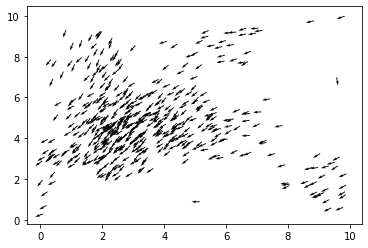

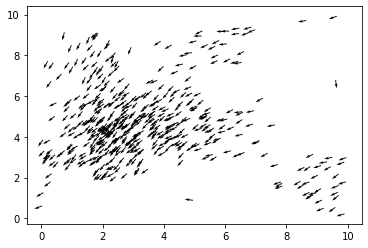

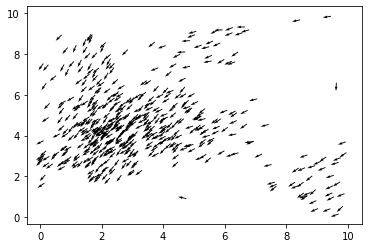

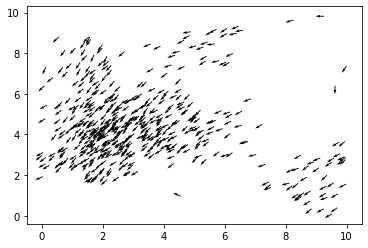

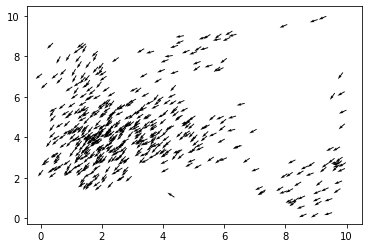

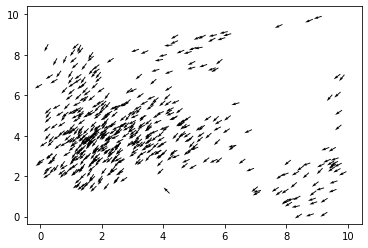

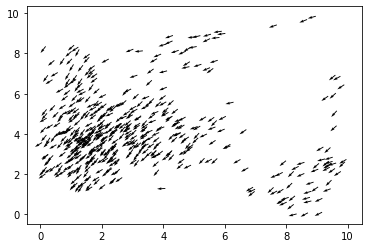

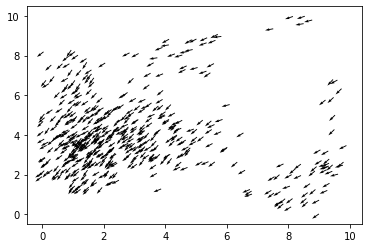

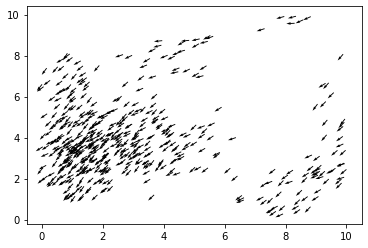

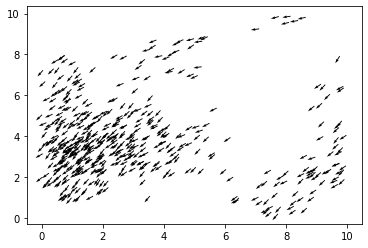

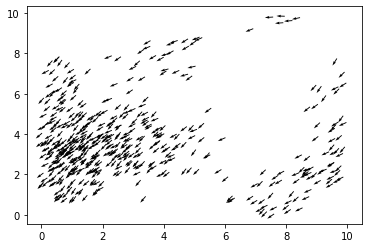

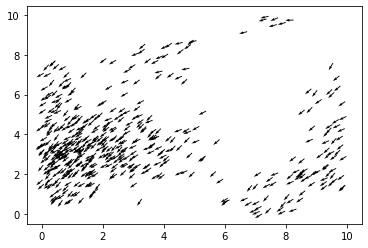

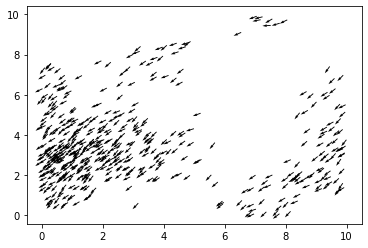

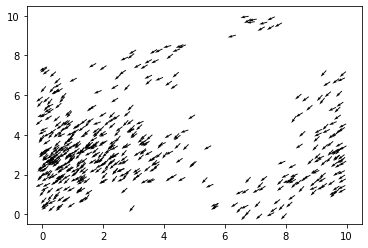

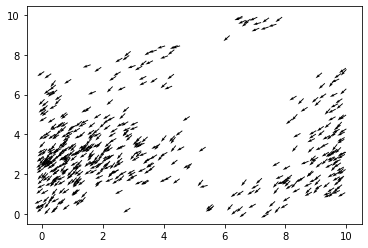

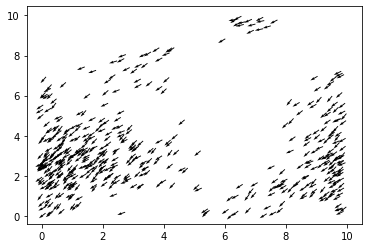

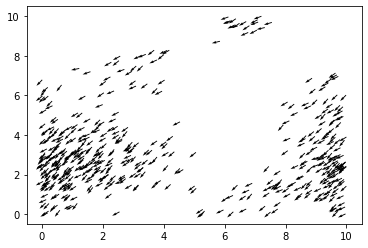

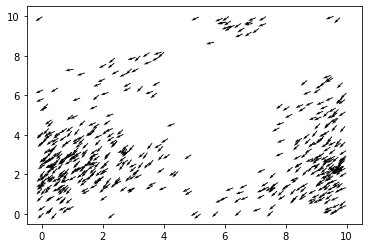

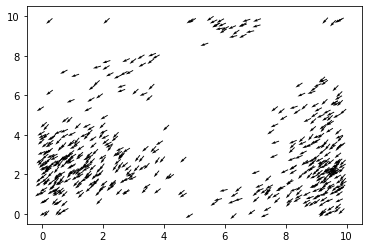

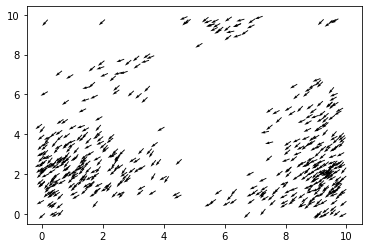

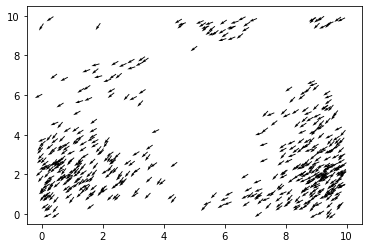

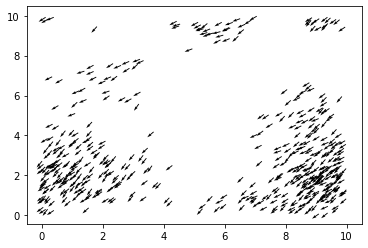

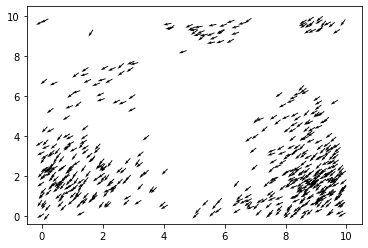

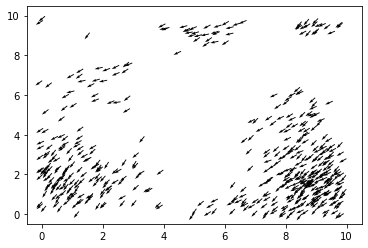

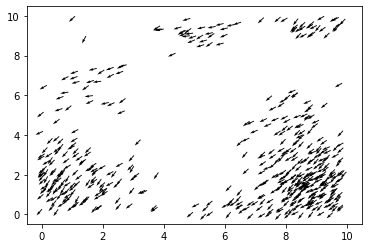

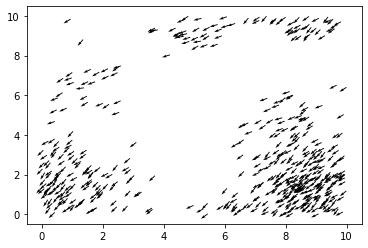

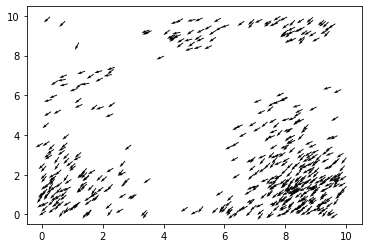

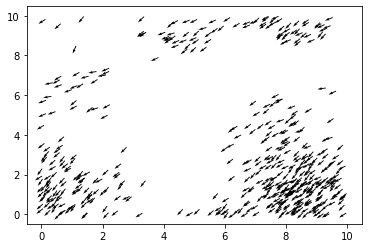

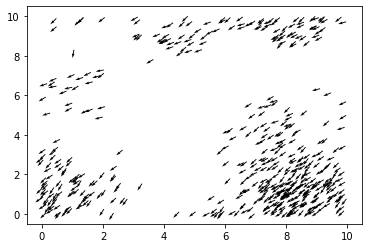

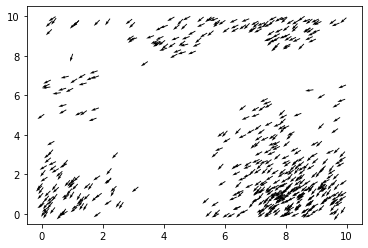

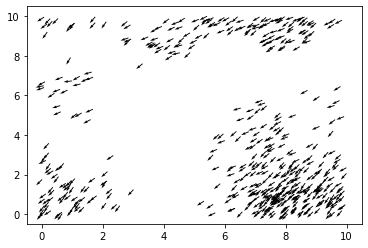

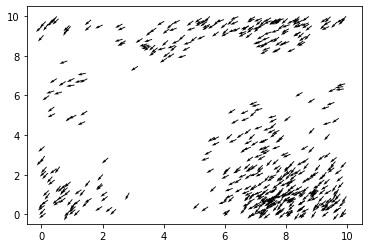

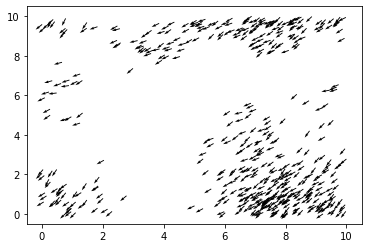

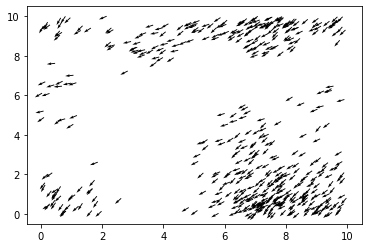

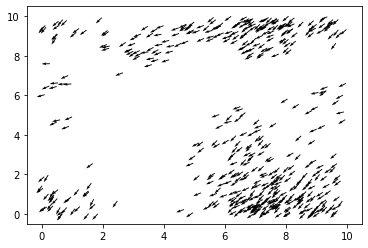

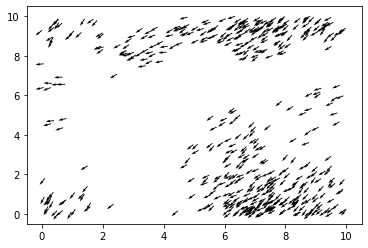

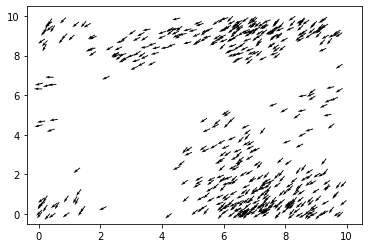

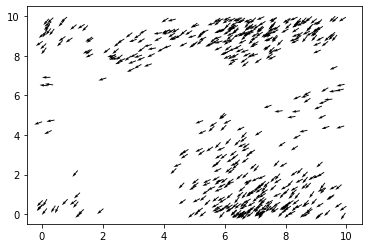

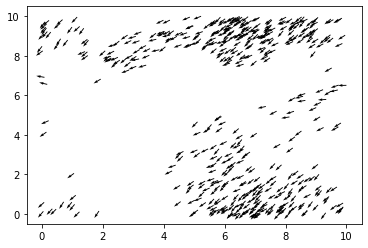

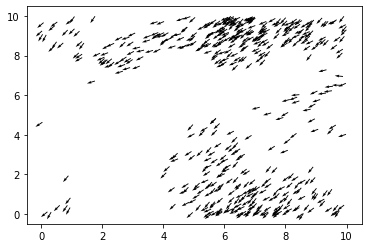

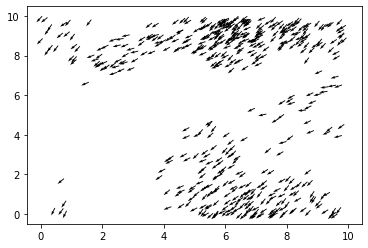

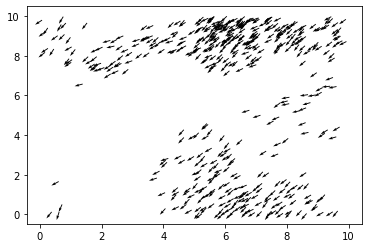

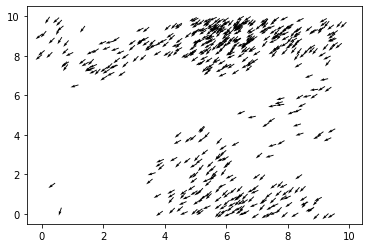

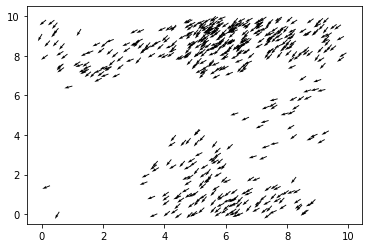

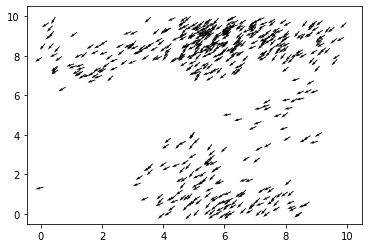

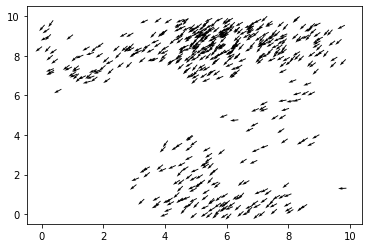

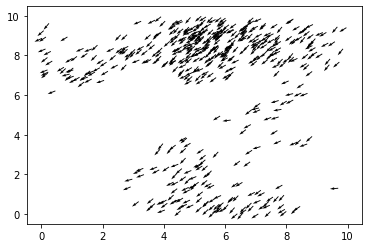

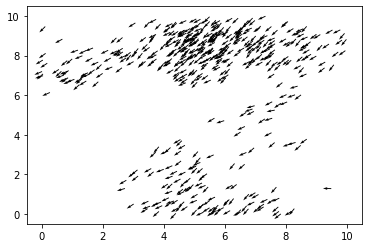

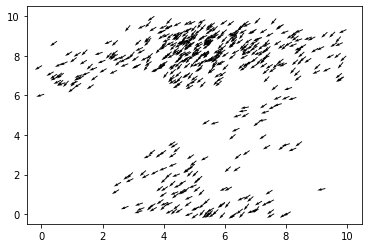

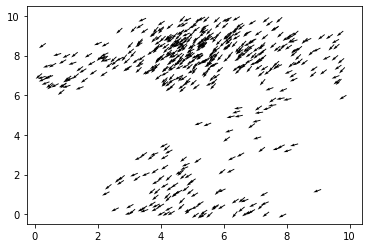

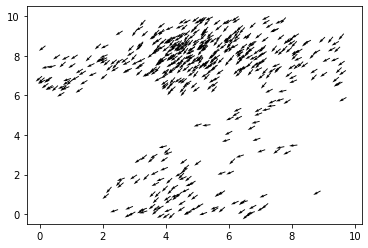

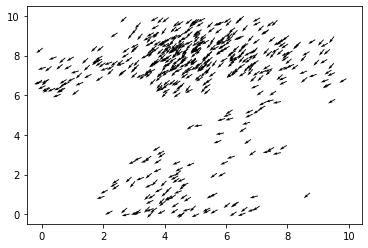

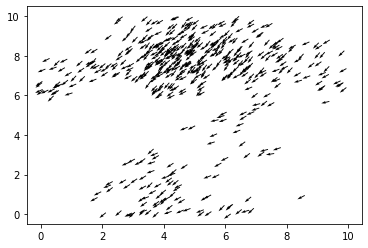

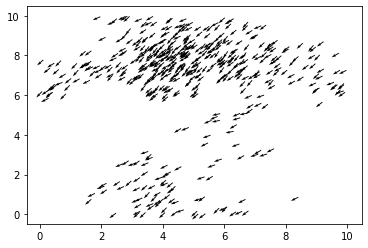

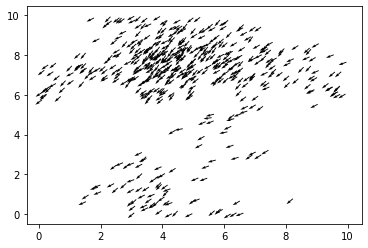

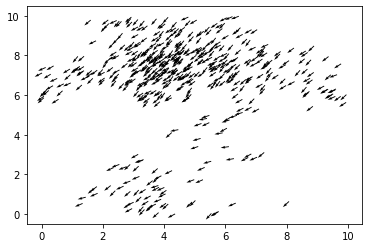

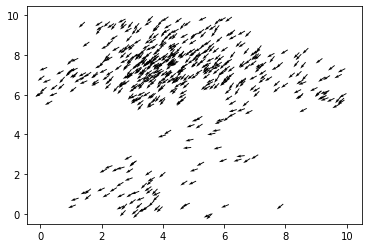

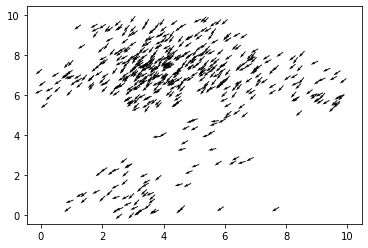

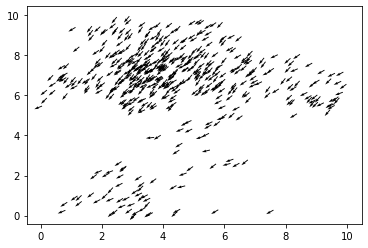

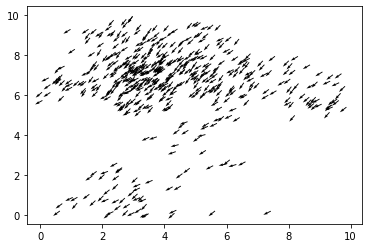

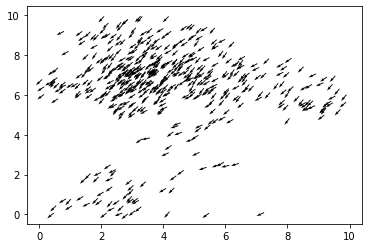

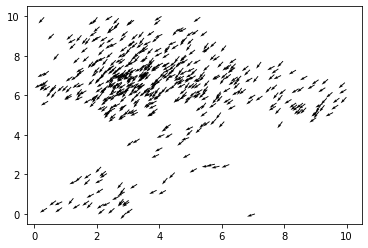

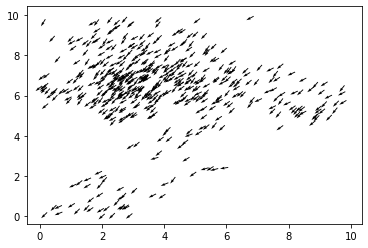

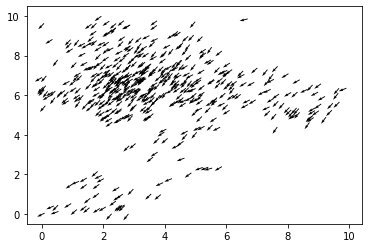

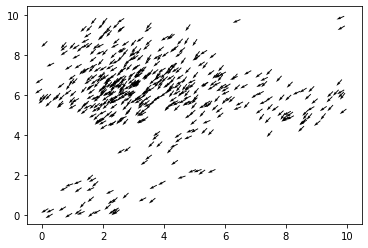

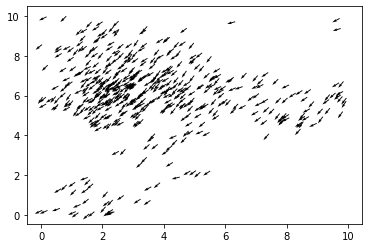

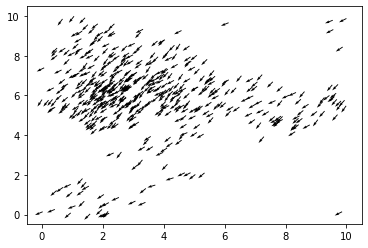

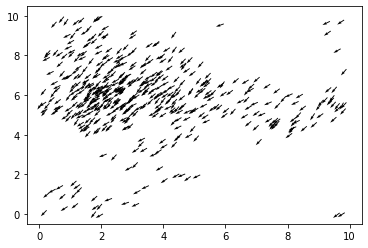

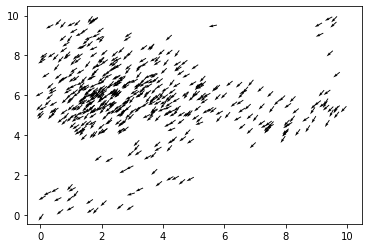

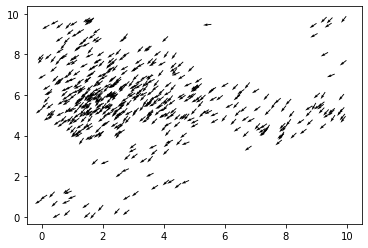

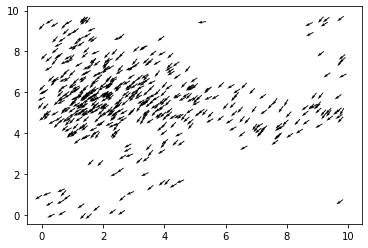

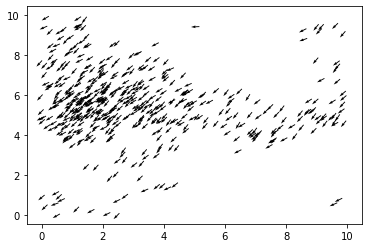

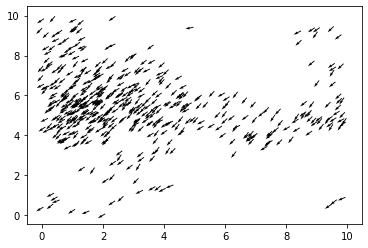

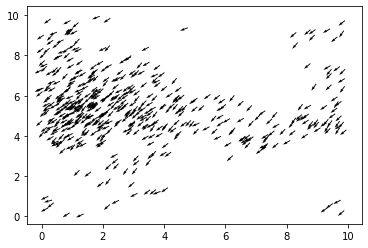

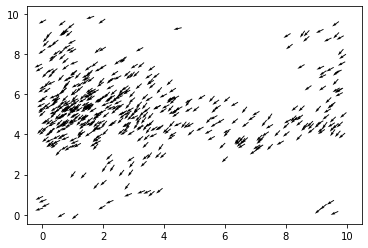

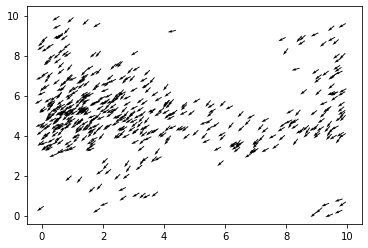

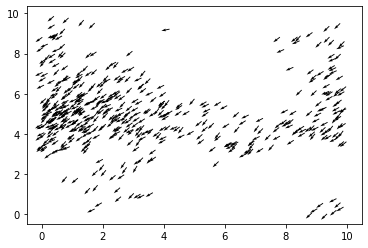

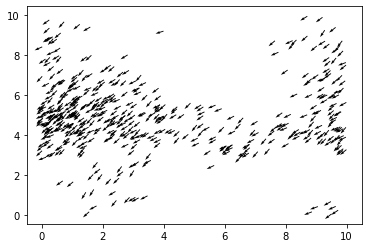

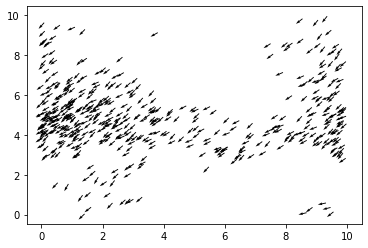

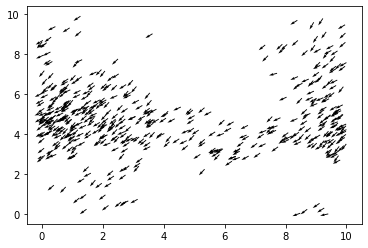

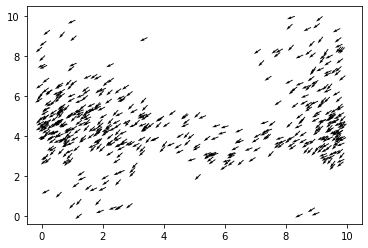

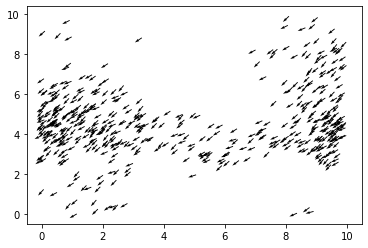

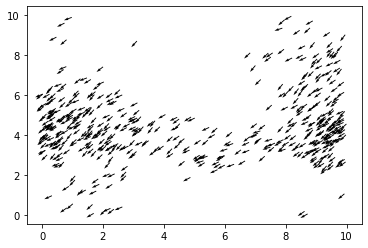

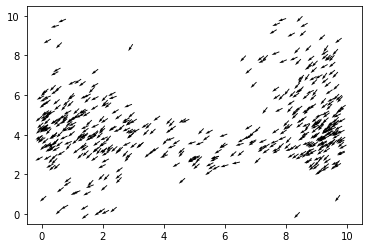

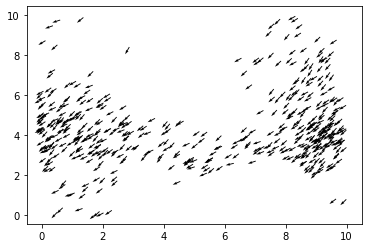

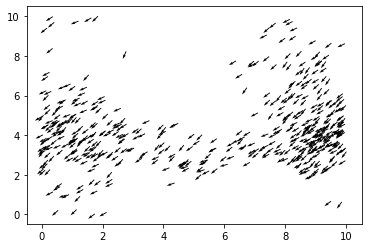

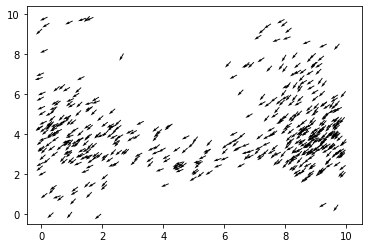

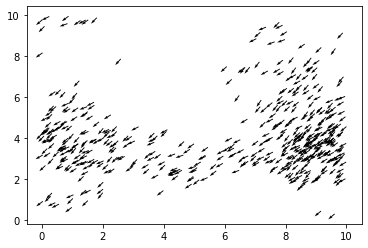

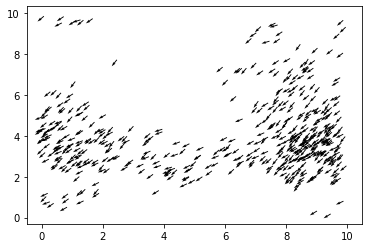

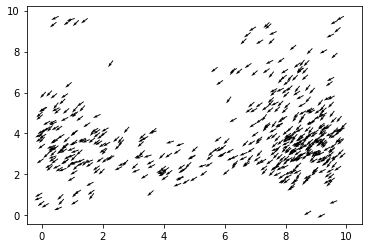

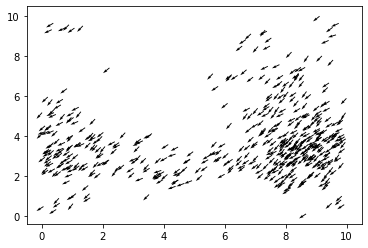

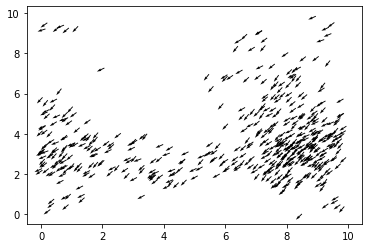

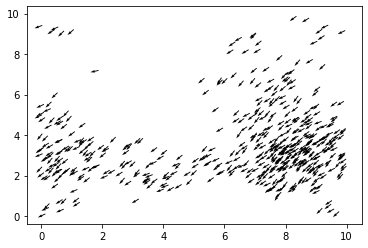

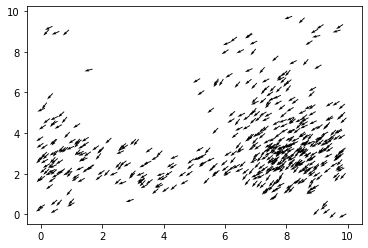

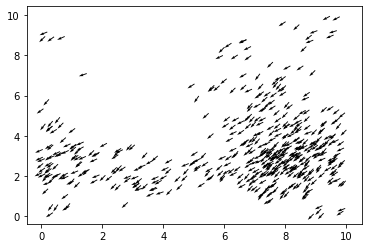

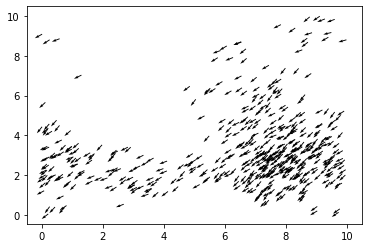

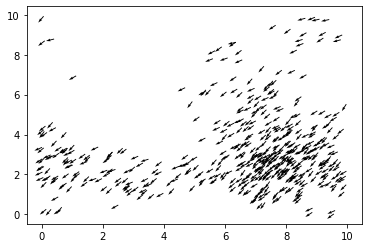

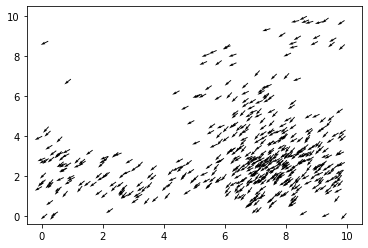

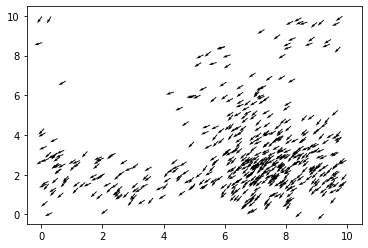

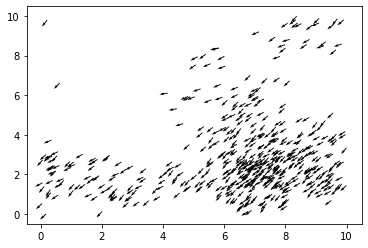

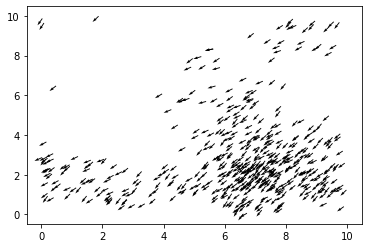

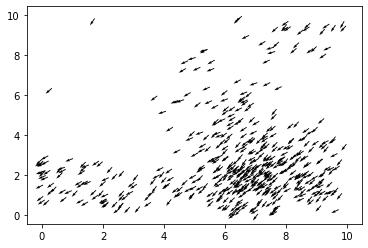

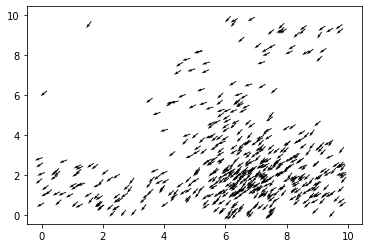

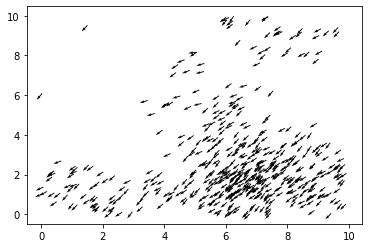

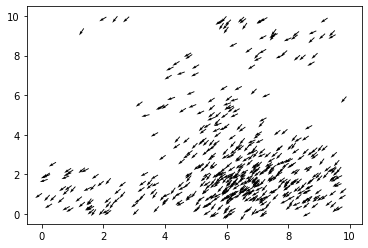

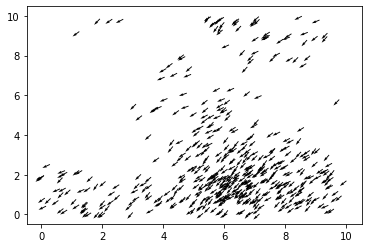

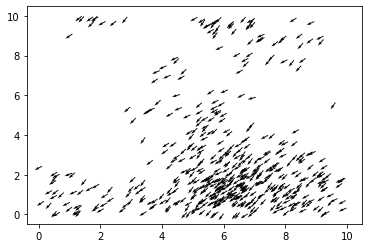

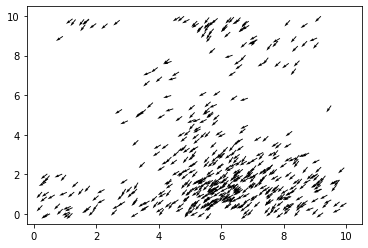

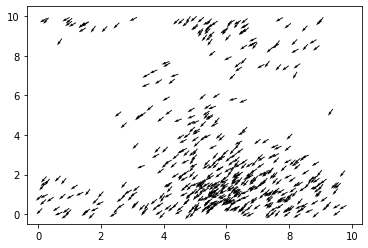

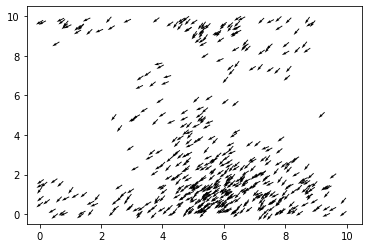

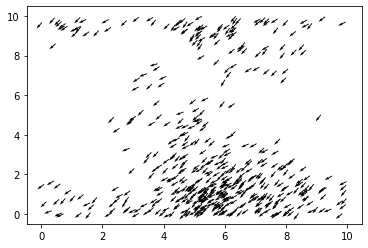

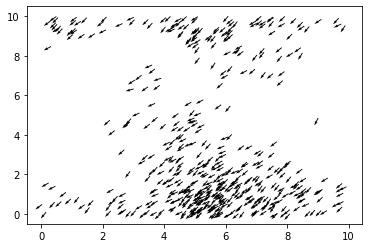

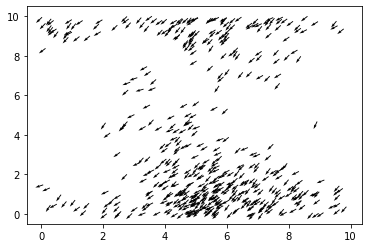

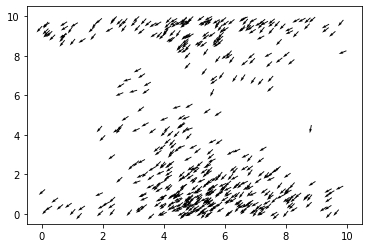

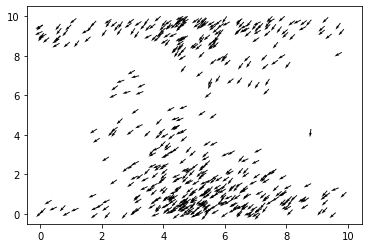

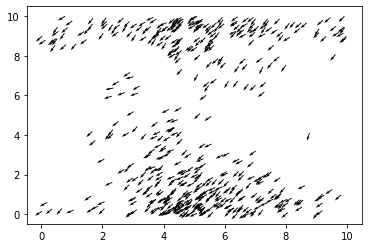

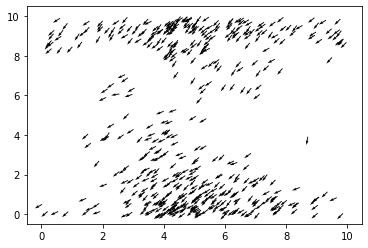

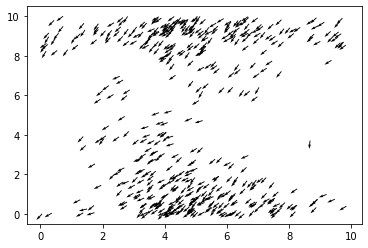

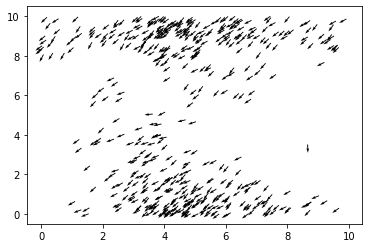

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff75ecf4c20> (for post_execute):


IndexError: ignored

IndexError: ignored

<Figure size 432x288 with 1 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

"""
Create Your Own Active Matter Simulation (With Python)
Philip Mocz (2021) Princeton Univeristy, @PMocz
Simulate Viscek model for flocking birds
"""



def main():
	""" Finite Volume simulation """
	
	# Simulation parameters
	v0           = 1.0      # velocity
	eta          = 0.5      # random fluctuation in angle (in radians)
	L            = 10       # size of box
	R            = 1        # interaction radius
	dt           = 0.2      # time step
	Nt           = 200      # number of time steps
	N            = 500      # number of birds
	plotRealTime = True
	
	# Initialize
	np.random.seed(17)      # set the random number generator seed

	# bird positions
	x = np.random.rand(N,1)*L
	y = np.random.rand(N,1)*L
	
	# bird velocities
	theta = 2 * np.pi * np.random.rand(N,1)
	vx = v0 * np.cos(theta)
	vy = v0 * np.sin(theta)
	
	# Prep figure
	fig = plt.figure(figsize=(4,4), dpi=80)
	ax = plt.gca()
	
	# Simulation Main Loop
	for i in range(Nt):

		# move
		x += vx*dt
		y += vy*dt
		
		# apply periodic BCs
		x = x % L
		y = y % L
		
		# find mean angle of neighbors within R
		mean_theta = theta
		for b in range(N):
			neighbors = (x-x[b])**2+(y-y[b])**2 < R**2
			sx = np.sum(np.cos(theta[neighbors]))
			sy = np.sum(np.sin(theta[neighbors]))
			mean_theta[b] = np.arctan2(sy, sx)
			
		# add random perturbations
		theta = mean_theta + eta*(np.random.rand(N,1)-0.5)
		
		# update velocities
		vx = v0 * np.cos(theta)
		vy = v0 * np.sin(theta)
		
		# plot in real time
		if plotRealTime or (i == Nt-1):
			plt.cla()
			plt.quiver(x,y,vx,vy)
			ax.set(xlim=(0, L), ylim=(0, L))
			ax.set_aspect('equal')	
			ax.get_xaxis().set_visible(False)
			ax.get_yaxis().set_visible(False)
			plt.pause(0.001)
				
	# Save figure
	# plt.savefig('activematter.png',dpi=240)
	plt.show()
	    
	return 0



if __name__== "__main__":
  main()